## Data Definition:
 
The real-valued features are as follows:

1) **Fixed acidity:** acidity in the wine <br>
2) **Volatile acidity:** steam distillable acid in wine<br>
3) **Citric acid:** amount of citric acid present in wine<br>
4) **Residual sugar:** sugar from grapes that's left over fermentation<br>
5) **Chlorides:** amount of chloride in wine which gives a salty flavor<br>
6) **Free sulfur dioxide:** amount of sulphur dioxide which is not bound to other molecules<br>
7) **Total sulfur dioxide:** free sulphur dioxide plus amount of sulphur dioxide which is bounded to other molecules
8) **Density:** molecular density of wine<br>
9) **Ph:** pH value of wines<br>
10) **Sulphates:** amount of sulphur added to prevent oxidation of wine and bacterial spoilage<br>
11) **Alcohol:** amount of alcohol <br>

Output variable (desired target):

11) **Quality** - values ranging from 0 to 10, which gives the rating of each wine

<a id='import_lib'></a>
## 1. Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
pd.set_option('display.float_format', lambda x: '%.2f' % x)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [4]:
# Let us read the data
wine = pd.read_csv('wine.csv')

In [5]:
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0           7.40              0.70         0.00            1.90       0.08   
1           7.80              0.88         0.00            2.60       0.10   
2           7.80              0.76         0.04            2.30       0.09   
3          11.20              0.28         0.56            1.90       0.07   
4           7.40              0.70         0.00            1.90       0.08   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
0                11.00                 34.00     1.00 3.51       0.56   
1                25.00                 67.00     1.00 3.20       0.68   
2                15.00                 54.00     1.00 3.26       0.65   
3                17.00                 60.00     1.00 3.16       0.58   
4                11.00                 34.00     1.00 3.51       0.56   

   alcohol  quality  
0     9.40        5  
1     9.80        5  
2     9.80        5  
3     9.80        6  
4     9.40        5

<a id='exploratory'></a>
## 2. Exploratory Data Analysis (EDA)

In [7]:
# Ques 1 a) Visualizing the first 10 rows from the data set
wine.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0           7.40              0.70         0.00            1.90       0.08   
1           7.80              0.88         0.00            2.60       0.10   
2           7.80              0.76         0.04            2.30       0.09   
3          11.20              0.28         0.56            1.90       0.07   
4           7.40              0.70         0.00            1.90       0.08   
5           7.40              0.66         0.00            1.80       0.07   
6           7.90              0.60         0.06            1.60       0.07   
7           7.30              0.65         0.00            1.20       0.07   
8           7.80              0.58         0.02            2.00       0.07   
9           7.50              0.50         0.36            6.10       0.07   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
0                11.00                 34.00     1.00 3.51       0.56   
1                25.00                 67.00     1.00 3.20       0.68   
2                15.00                 54.00     1.00 3.26       0.65   
3                17.00                 60.00     1.00 3.16       0.58   
4                11.00                 34.00     1.00 3.51       0.56   
5                13.00                 40.00     1.00 3.51       0.56   
6                15.00                 59.00     1.00 3.30       0.46   
7                15.00                 21.00     0.99 3.39       0.47   
8                 9.00                 18.00     1.00 3.36       0.57   
9                17.00                102.00     1.00 3.35       0.80   

   alcohol  quality  
0     9.40        5  
1     9.80        5  
2     9.80        5  
3     9.80        6  
4     9.40        5  
5     9.40        5  
6     9.40        5  
7    10.00        7  
8     9.50        7  
9    10.50        5

In [8]:
# Let us take a look at the data types of the variables
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [9]:
# Ques 1 b) Check the shape of the data set
wine.shape

(1599, 12)

We can see here that the data set contains 1599 observations and 12 attributes

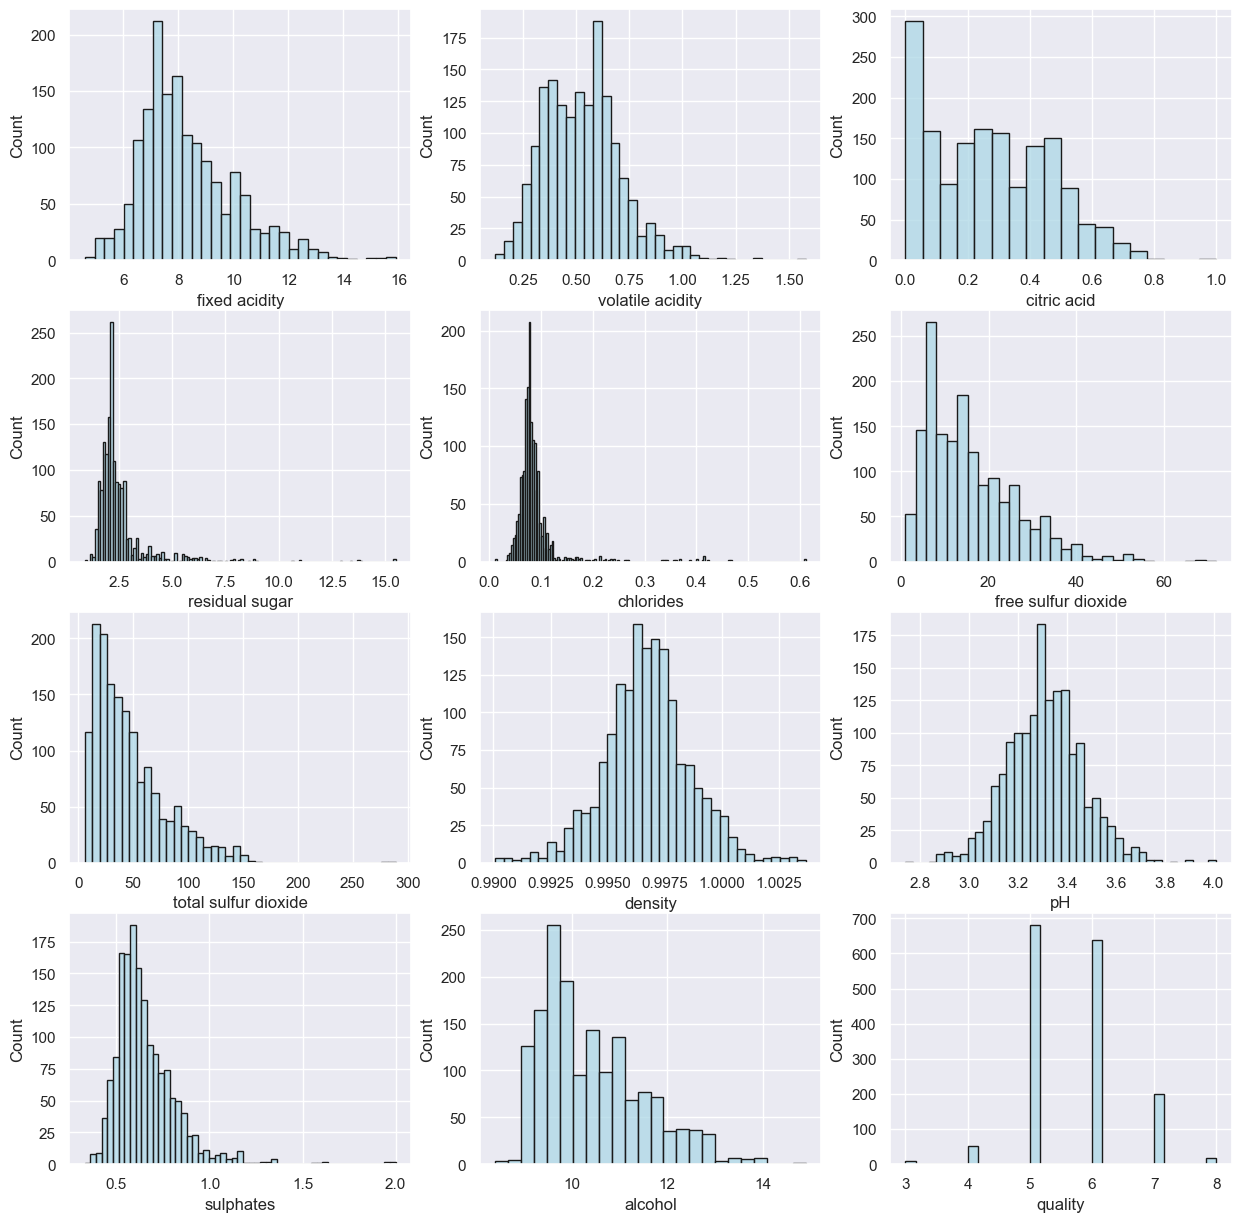

In [11]:
# Ques 1 c) Show distribution of the numerical columns
sns.set()
fig = plt.figure(figsize = [15, 15])

# Specifying the columns
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 
        'residual sugar', 'chlorides', 'free sulfur dioxide', 
        'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
count = 1

# Generating the plots
for col in cols :
    plt.subplot(4,3,count)
    sns.histplot(wine[col], edgecolor="k", linewidth=1, color='lightblue')
    count+=1
plt.show() 

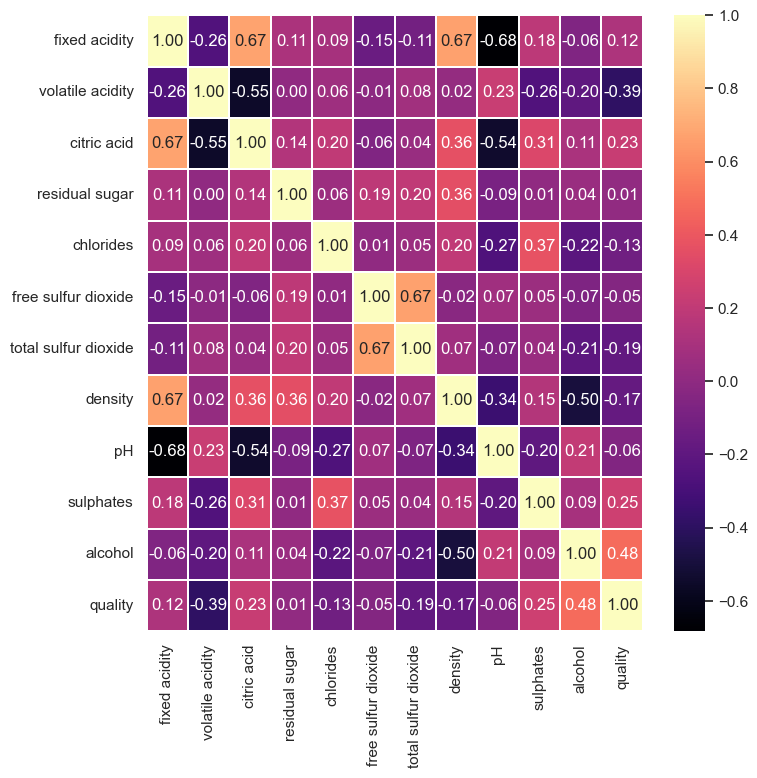

In [12]:
# Ques 1 d) Generate the correlation matrix
plt.figure(figsize = (8, 8))
sns.heatmap(wine.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

A high positive correlation of 0.67 is observed between :

fixed acidity & citric acid<br>
fixed acidity & density<br>
free sulfur dioxide & total sulfur dioxide<br>
fixed acidity & pH are negatively correlated with a high absolute magnitude of 0.68 .

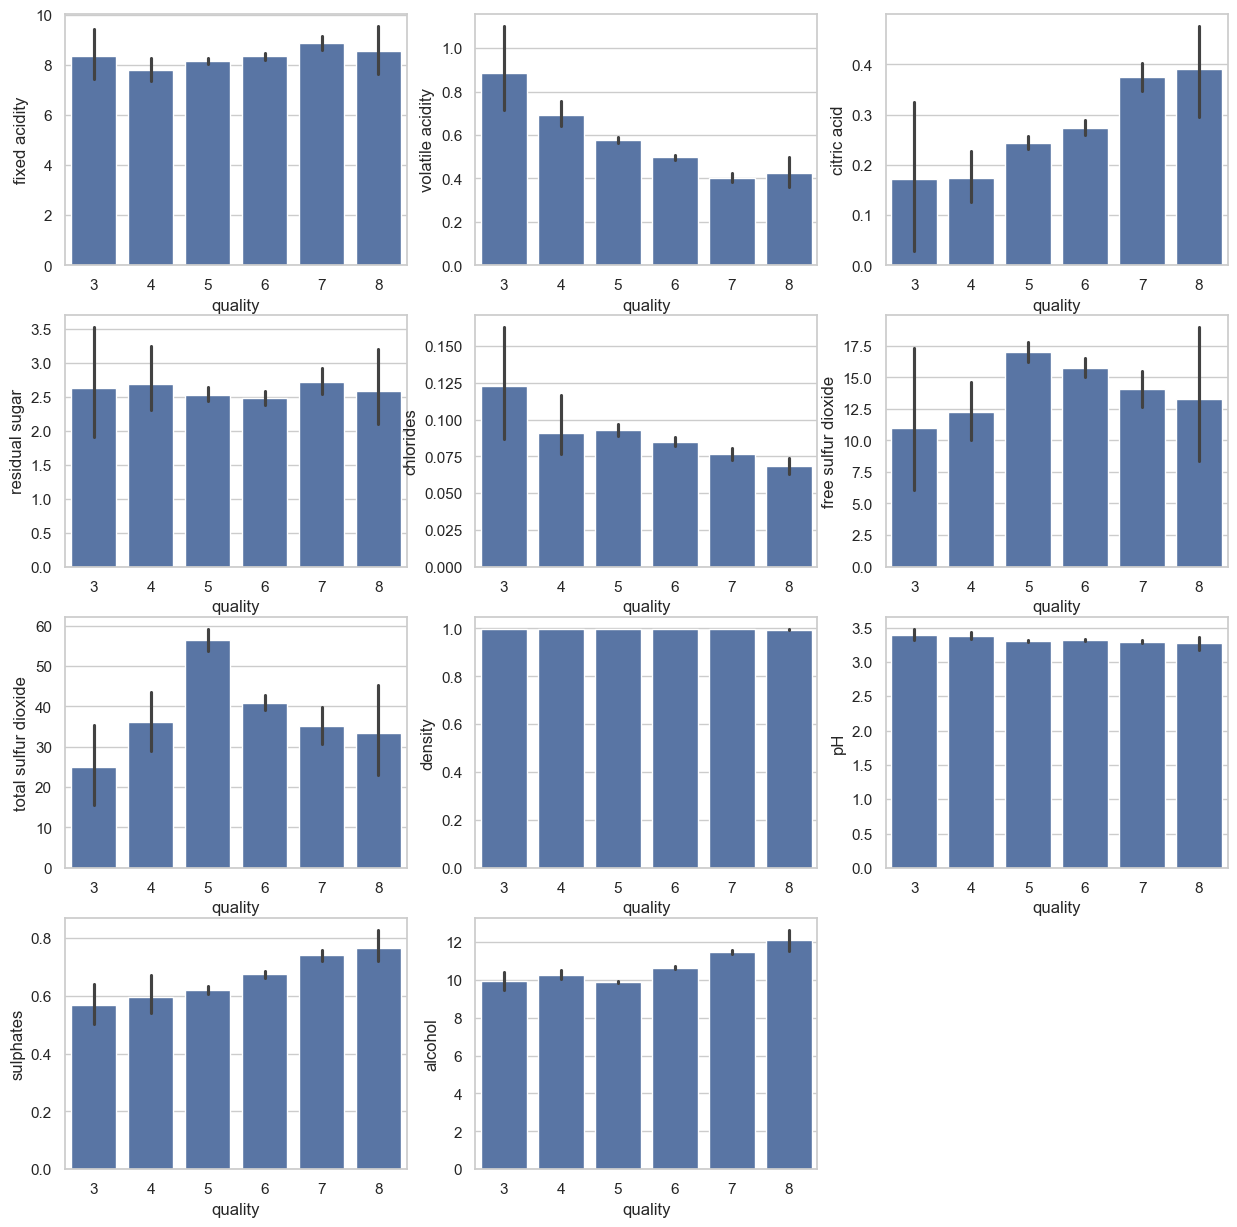

In [14]:
# Ques 1 e) Visualize whether any attributes are related to the target variable
sns.set_style("whitegrid")
fig = plt.figure(figsize = [15, 15])

# Plotting the independent variables with the target variable
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 
        'residual sugar', 'chlorides', 'free sulfur dioxide', 
        'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
count = 1

# Generating the plots
for col in cols :
    plt.subplot(4,3,count)
    sns.barplot(data = wine, x = 'quality', y = col)
    count+=1
plt.show()  

Here, we can see that:
There is an increase in the following attributes as the wine quality increases :

1) citric acid <br>
2) sulphates<br>
3) alcohol<br>

A decrease is observed in the following as the wine quality increases :

1) volatile acidity<br>
2) chlorides<br>
3) pH<br>

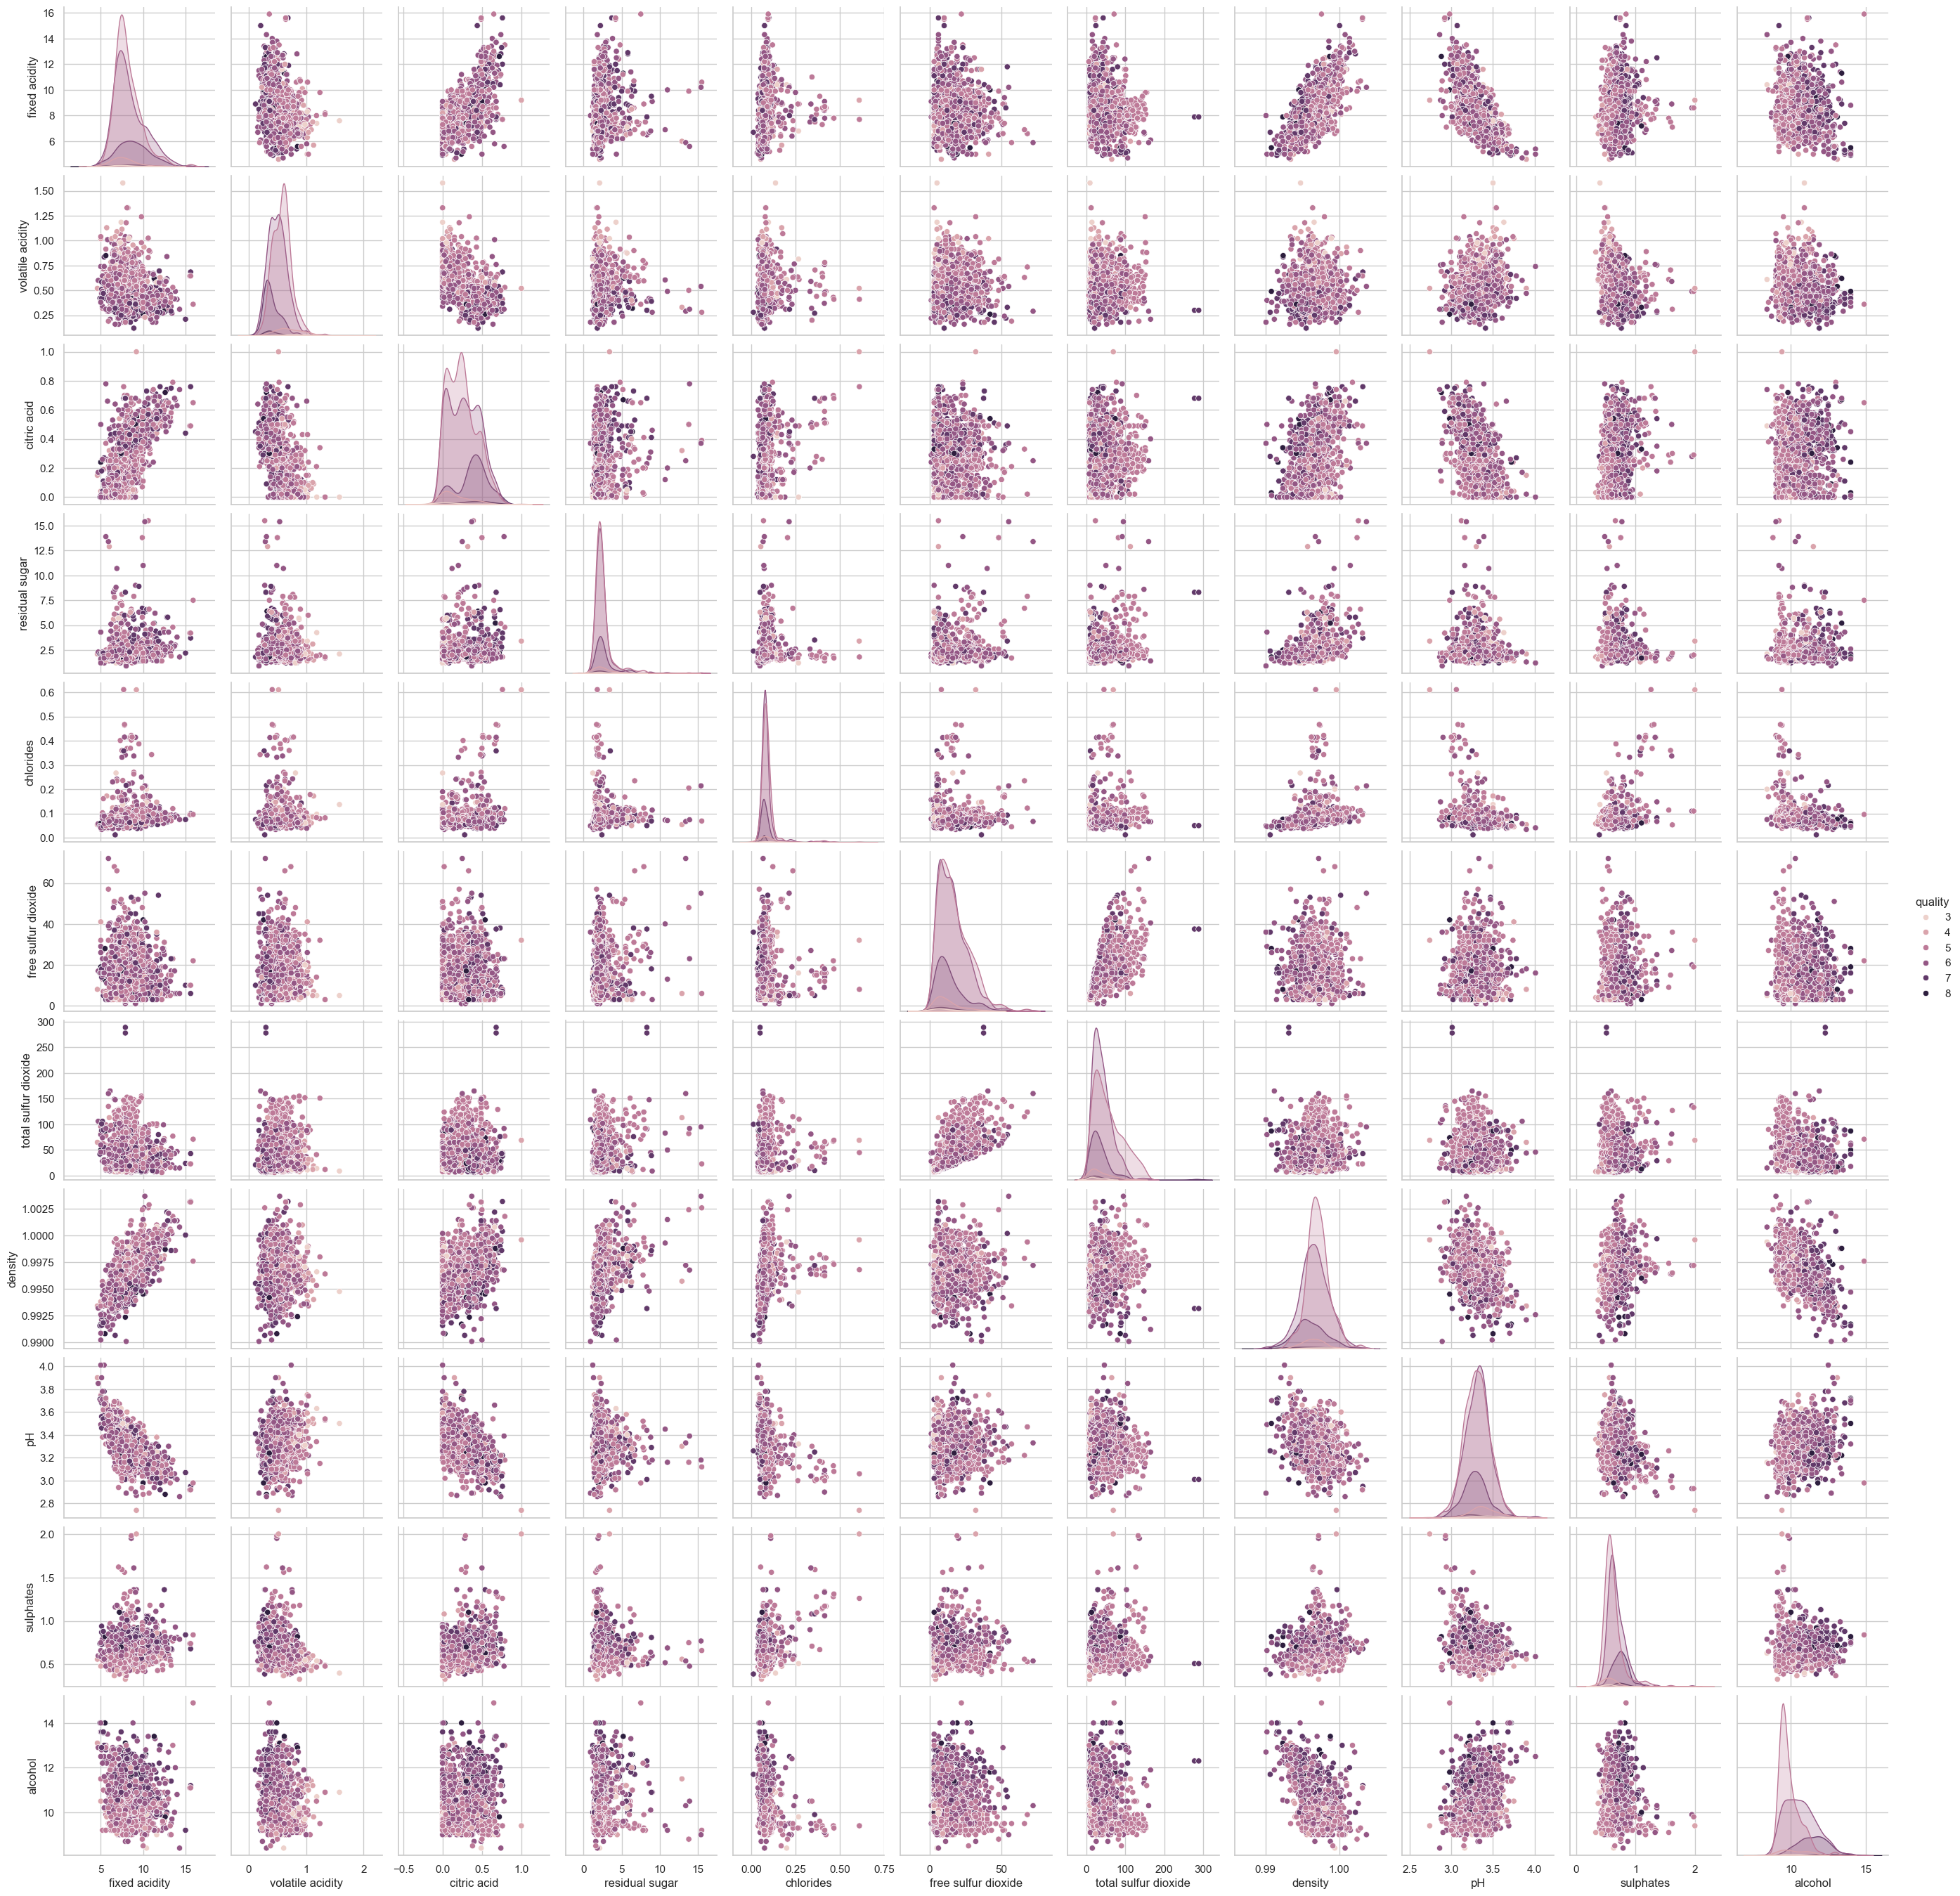

In [16]:
# Ques 2) Generate pair-plot for the data
sns.pairplot(wine, hue = 'quality')
plt.show()

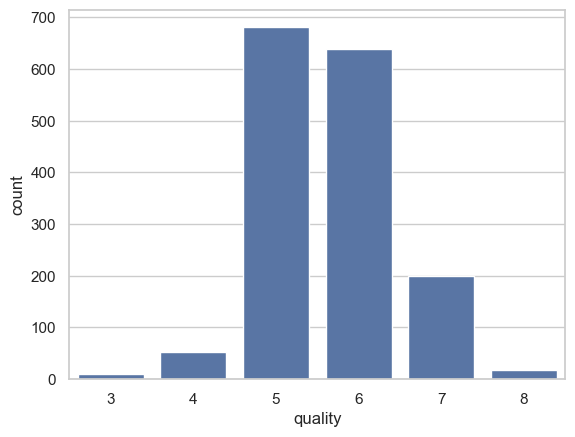

In [17]:
# Ques 3) Generate a count plot for the target variable (quality)
sns.countplot(data = wine, x = 'quality')
plt.show()

Here we can see that most of the wines have the quality rating of 5 or 6

In [19]:
# Ques 4) Converting the target variable 'Quality' to categorical
# Such that 
# Wines having the “Quality” value > 6.5  are assigned value 1, and 
# Wines having the “Quality” value < 6.5, are assigned value 0
# Where 0: Ordinary Quality of wine and 1: High quality of wine

wine['quality'] = wine.quality.apply(lambda x : 1 if x > 6.5 else 0)

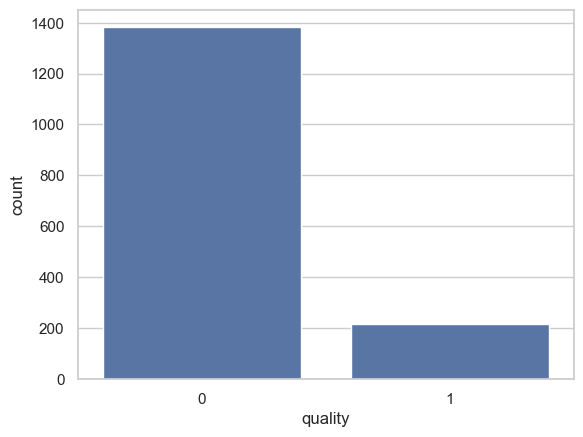

In [20]:
# Let us again visualize the count plot for the target variable
sns.countplot(data = wine, x = 'quality')
plt.show()

We can see that very few wines in the data set are of high quality while most of them are of ordinary quality

<a id='model'></a>
## 3. Building a RF model

In [23]:
# Splitting the data set into train and test sets
x = wine.drop('quality',axis=1)
y = wine['quality']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 100)

### Parameters in the classifier
1) **n_estimators:** number of trees in the forest<br>
2) **criterion:** the function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain<br>
3) **min_samples_split:** the minimum number of samples required to split an internal node, default = 2<br>
4) **min_samples_leaf:** the minimum number of samples required to be at a leaf node<br>
5) **max_features:** the number of features to consider when looking for the best split, default = "auto" <br>
6) **random_state:** controls both the randomness of the bootstrapping of the samples used when building trees and the sampling of the features to consider when looking for the best split at each node<br>
7) **max_depth:** the maximum depth of the tree

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc


Baseline Accuracy: 0.9031
Baseline AUC: 0.8842
Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best params: {'criterion': 'entropy', 'max_depth': 12, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Accuracy: 0.9023
Tuned Model Accuracy: 0.9156
Tuned Model AUC: 0.9308


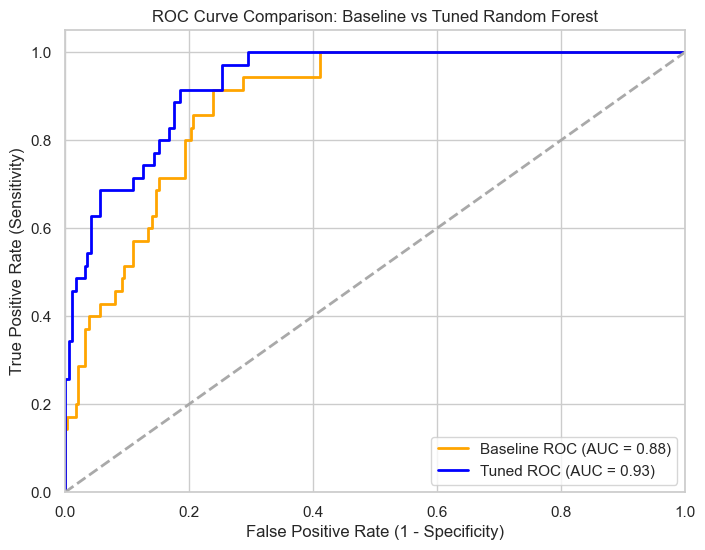

In [29]:
# 1) Baseline Random Forest model
clf_rf = RandomForestClassifier(
    n_estimators=200, criterion='entropy',
    min_samples_split=10, min_samples_leaf=9,
    max_depth=12, random_state=500
)
clf_rf.fit(x_train, y_train)
y_pred = clf_rf.predict(x_test)
baseline_acc = accuracy_score(y_test, y_pred)
print(f'Baseline Accuracy: {baseline_acc:.4f}')

y_proba = clf_rf.predict_proba(x_test)[:, 1]
fpr_base, tpr_base, _ = roc_curve(y_test, y_proba)
auc_base = auc(fpr_base, tpr_base)
print(f'Baseline AUC: {auc_base:.4f}')

# 2) Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 9],
    'max_depth': [3, 6, 12, None],
    'max_features': [None, 'sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=100)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)

print(f"Best params: {grid_search.best_params_}")
print(f"Best CV Accuracy: {grid_search.best_score_:.4f}")

# Train model with best params
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(x_test)
tuned_acc = accuracy_score(y_test, y_pred_best)
print(f'Tuned Model Accuracy: {tuned_acc:.4f}')

y_proba_best = best_rf.predict_proba(x_test)[:, 1]
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_proba_best)
auc_tuned = auc(fpr_tuned, tpr_tuned)
print(f'Tuned Model AUC: {auc_tuned:.4f}')

# 3) Plot ROC Curves for both models
plt.figure(figsize=(8, 6))
plt.plot(fpr_base, tpr_base, color='orange', lw=2, label=f'Baseline ROC (AUC = {auc_base:.2f})')
plt.plot(fpr_tuned, tpr_tuned, color='blue', lw=2, label=f'Tuned ROC (AUC = {auc_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='darkgrey', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve Comparison: Baseline vs Tuned Random Forest')
plt.legend(loc='lower right')
plt.show()